# JUPYTER NOTEBOOK CONVERTED TO PDF AND MERGED WITH REPORT

### AUTOMATIC CONVERSION OF NOTEBOOK TO PDF MIGHT CREATE SOME MISALIGNMENTS ETC.

In [ ]:
import numpy as np # Loading suitable packages for
import pandas as pd # Importing dataset,visualizing data
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler #importing ML packages
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report;
from sklearn.linear_model import LogisticRegression

In [5]:
diabetes_data = pd.read_csv('PimaDiabetes.csv')#Importing given dataset

# 2) EDA - EXPLORATORY DATA ANALYSIS

In [6]:
diabetes_data.info() #finding different datatypes & null count

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Pregnancies       750 non-null    int64  
 1   Glucose           750 non-null    int64  
 2   BloodPressure     750 non-null    int64  
 3   SkinThickness     750 non-null    int64  
 4   Insulin           750 non-null    int64  
 5   BMI               750 non-null    float64
 6   DiabetesPedigree  750 non-null    float64
 7   Age               750 non-null    int64  
 8   Outcome           750 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 52.9 KB


In [7]:
diabetes_data.describe()#finding count,mean,std,min,quartile and max values

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigree,Age,Outcome
count,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000
mean,3.844000,120.737333,68.982667,20.489333,80.378667,31.959067,0.473544,33.166667,0.346667
std,3.370085,32.019671,19.508814,15.918828,115.019198,7.927399,0.332119,11.708872,0.476226
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,36.500000,32.000000,0.377000,29.000000,0.000000
75%,6.000000,140.750000,80.000000,32.000000,129.750000,36.575000,0.628500,40.750000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
diabetes_data.head()#Looking at first 5 values of dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
diabetes_data.shape #Finding the shape of dataset 750 ROWS/ 9 Columns

(750, 9)

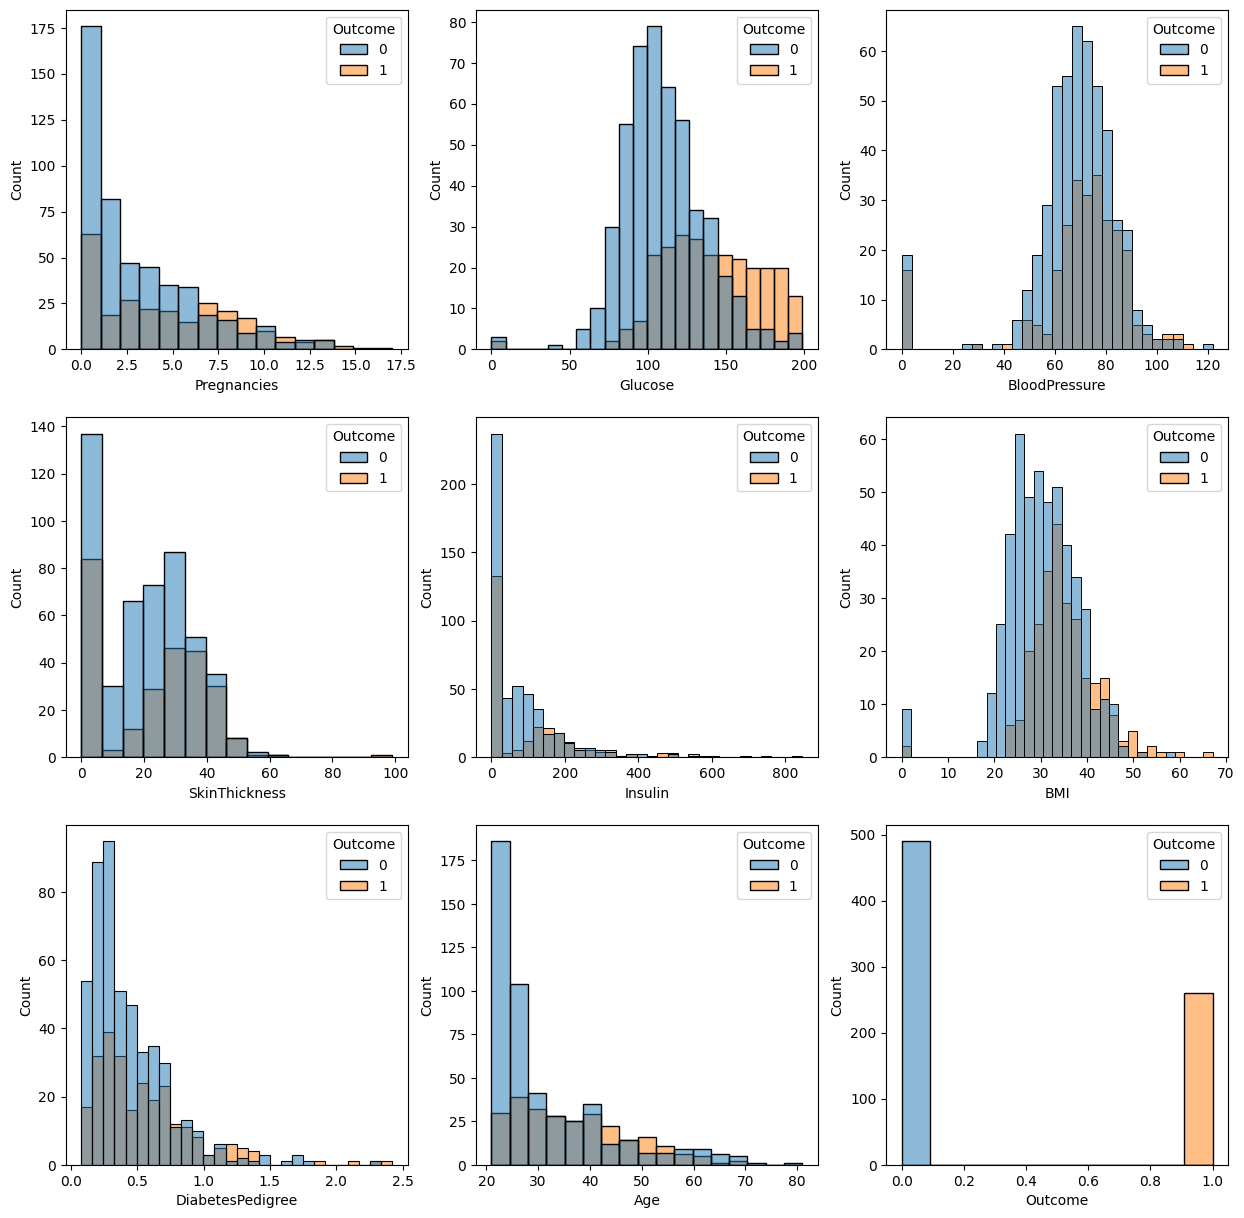

In [18]:
plt.figure(figsize=(15, 15)) #To find the distributions of different columns
i = 1                       # We can see Normal & Skewed distributions
for column_name in diabetes_data.columns:
    plt.subplot(3, 3, i) # Using Histogram from Seaborn Library
    sns.histplot(data=diabetes_data, x=col_name, hue="Outcome")
    i += 1
plt.show()

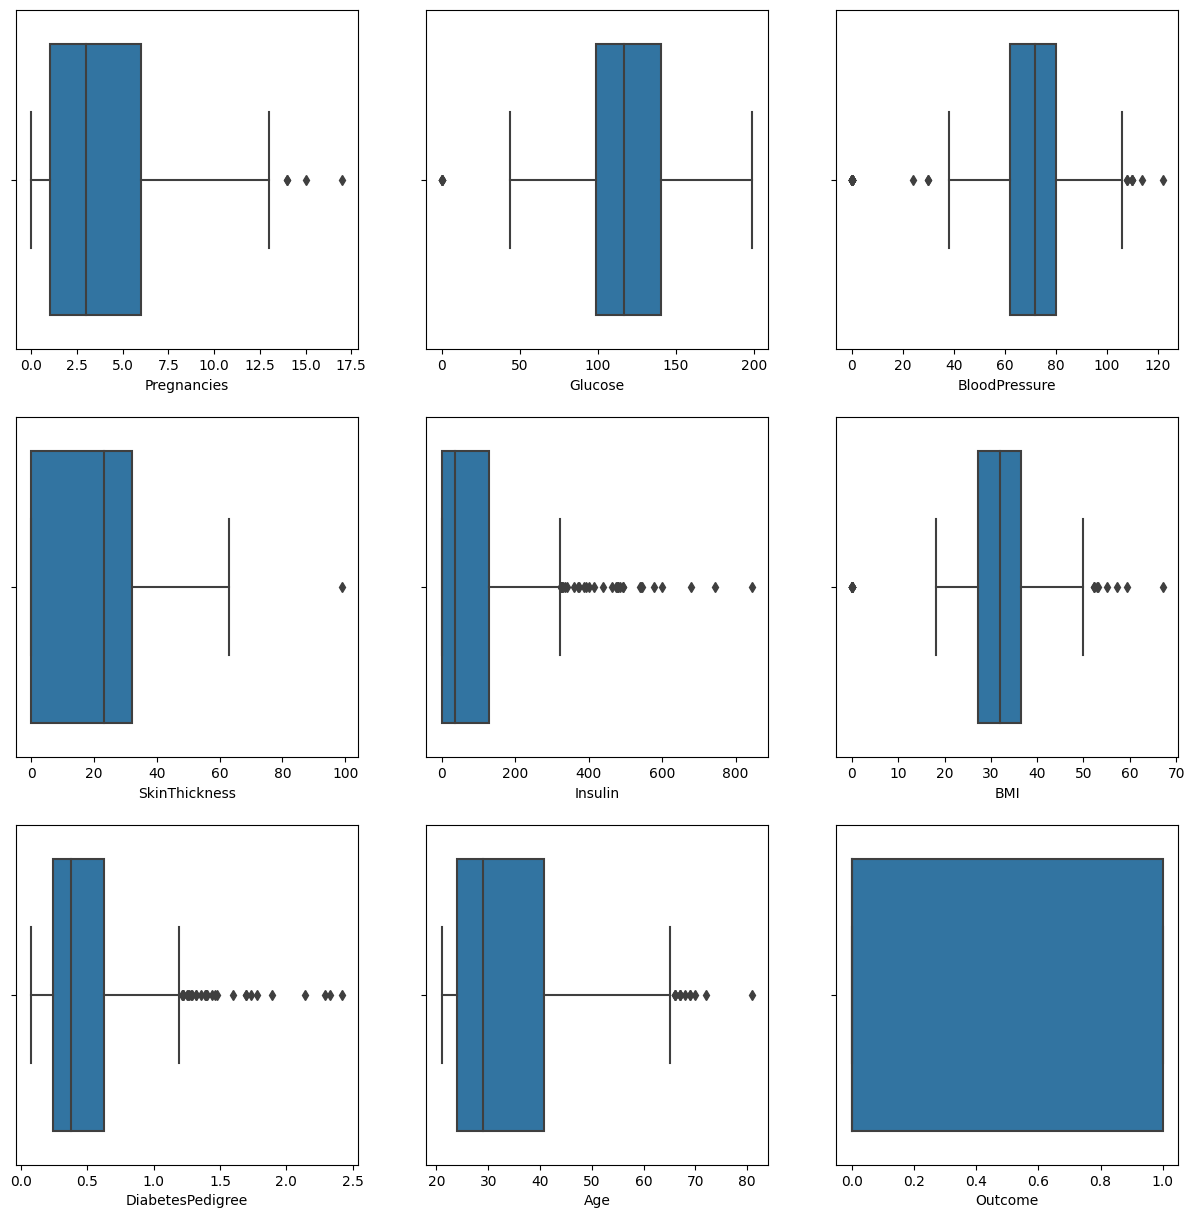

In [19]:
plt.figure(figsize=(15, 15)) # to find outliers and abnormality
i = 1       # of dataset for different columns
for column_name in diabetes_data.columns:
    plt.subplot(3, 3, i) # Using boxplot from Seaborn Library
    sns.boxplot(data=diabetes_data, x=col_name, hue="Outcome")
    i += 1
plt.show()

In [25]:
i = 1 # To find mean - median of the respective columns
for column_name in diabetes_data.columns:
    print("Median "+ column_name, diabetes_data[column_name].median())
    print("Mean " + column_name, diabetes_data[column_name].mean())
i += 1

Median Pregnancies 3.0
Mean Pregnancies 3.844
Median Glucose 117.0
Mean Glucose 120.73733333333334
Median BloodPressure 72.0
Mean BloodPressure 68.98266666666666
Median SkinThickness 23.0
Mean SkinThickness 20.489333333333335
Median Insulin 36.5
Mean Insulin 80.37866666666666
Median BMI 32.0
Mean BMI 31.959066666666665
Median DiabetesPedigree 0.377
Mean DiabetesPedigree 0.473544
Median Age 29.0
Mean Age 33.166666666666664
Median Outcome 0.0
Mean Outcome 0.3466666666666667


In [26]:
diabetes_data.isnull().sum() #To find any null values from dataset
#diabetes_data.isnull().any() # Same can be achieved using this 2 formula's
#diabetes_data.isnull().all()

Pregnancies         0
Glucose             0
BloodPressure       0
SkinThickness       0
Insulin             0
BMI                 0
DiabetesPedigree    0
Age                 0
Outcome             0
dtype: int64

In [13]:
corr=diabetes_data.corr()
corr ## to find correlation before any data cleaning 
## We can see some abnormal or not so good correlation values

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigree,Age,Outcome
Pregnancies,1.000000,0.129594,0.142453,-0.087047,-0.070822,0.021739,-0.031085,0.547124,0.229235
Glucose,0.129594,1.000000,0.145972,0.056647,0.333005,0.214316,0.140364,0.259797,0.460310
BloodPressure,0.142453,0.145972,1.000000,0.205494,0.086750,0.278569,0.042922,0.237693,0.060860
SkinThickness,-0.087047,0.056647,0.205494,1.000000,0.436093,0.394615,0.189191,-0.115862,0.082205
Insulin,-0.070822,0.333005,0.086750,0.436093,1.000000,0.195726,0.191289,-0.040152,0.130928
BMI,0.021739,0.214316,0.278569,0.394615,0.195726,1.000000,0.143798,0.032972,0.289832
DiabetesPedigree,-0.031085,0.140364,0.042922,0.189191,0.191289,0.143798,1.000000,0.041807,0.170688
Age,0.547124,0.259797,0.237693,-0.115862,-0.040152,0.032972,0.041807,1.000000,0.232892
Outcome,0.229235,0.460310,0.060860,0.082205,0.130928,0.289832,0.170688,0.232892,1.000000


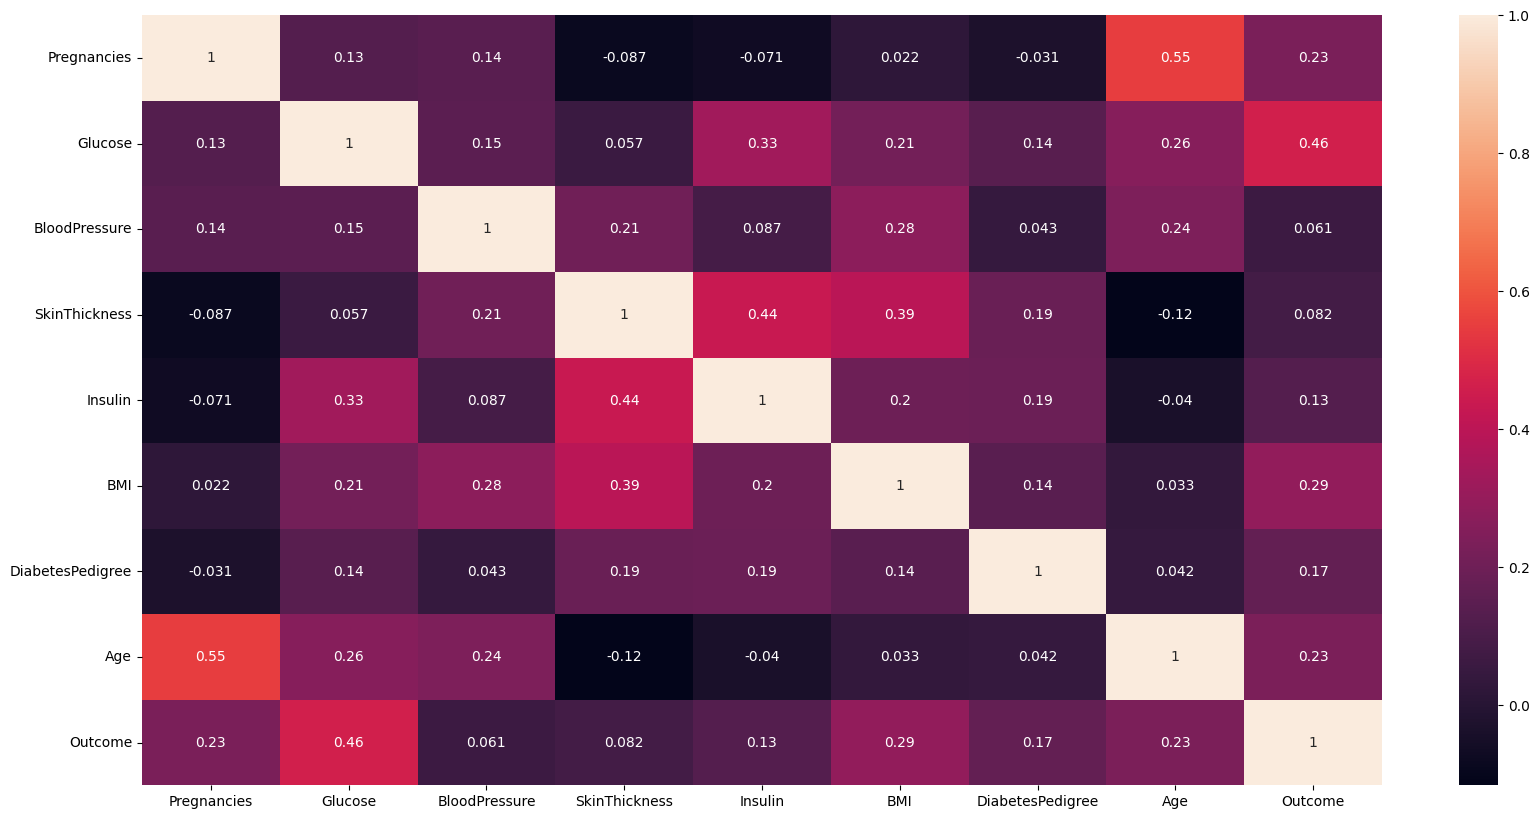

In [14]:
plt.subplots(figsize=(20, 10)) #Graphical Representation of Uncleaned Data
sns.heatmap(data=corr, annot=True) # using Heatmap from Seaborn Library
plt.show()

In [15]:
corr["Outcome"].sort_values(ascending=False) #Correlation values in Descending order wrt Outcome

Outcome             1.000000
Glucose             0.460310
BMI                 0.289832
Age                 0.232892
Pregnancies         0.229235
DiabetesPedigree    0.170688
Insulin             0.130928
SkinThickness       0.082205
BloodPressure       0.060860
Name: Outcome, dtype: float64

In [28]:
for i in diabetes_data.columns[:-1]: # The data didn't have null values but multiple 0 values
# Zero which are not possible and cause medical anomalies hence we find no. of zero values
    print(f" {i} = {len(diabetes_data[diabetes_data[i]==0])}, 0 values")

 Pregnancies = 109, 0 values
 Glucose = 5, 0 values
 BloodPressure = 35, 0 values
 SkinThickness = 221, 0 values
 Insulin = 362, 0 values
 BMI = 11, 0 values
 DiabetesPedigree = 0, 0 values
 Age = 0, 0 values


In [29]:
#Based on the distribution histogram seen above
#replacing 0 values with mean/median of that column based on their distribution
diabetes_data['Glucose']=diabetes_data['Glucose'].replace(0,diabetes_data['Glucose'].mean())#normal
diabetes_data['BloodPressure']=diabetes_data['BloodPressure'].replace(0,diabetes_data['BloodPressure'].mean())#normal 
diabetes_data['SkinThickness']=diabetes_data['SkinThickness'].replace(0,diabetes_data['SkinThickness'].median())#skewed 
diabetes_data['Insulin']=diabetes_data['Insulin'].replace(0,diabetes_data['Insulin'].median())#skewed 
diabetes_data['BMI']=diabetes_data['BMI'].replace(0,diabetes_data['BMI'].median())#skewed 
# Pregnancies and Outcome have not been included as it is part of datasets and both are possible cases
# Pregnancies 0 = No kids
# Outcome 0 = No diabetes

In [30]:
for i in diabetes_data.columns[:-1]: # Now the zero values have been cleaned up
    print(f" {i} = {len(diabetes_data[diabetes_data[i]==0])}, 0 values")

 Pregnancies = 109, 0 values
 Glucose = 0, 0 values
 BloodPressure = 0, 0 values
 SkinThickness = 0, 0 values
 Insulin = 0, 0 values
 BMI = 0, 0 values
 DiabetesPedigree = 0, 0 values
 Age = 0, 0 values


In [31]:
corr_new=diabetes_data.corr() # Saving and find new correlation
corr_new

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigree,Age,Outcome
Pregnancies,1.000000,0.128068,0.211608,0.029973,-0.048568,0.026288,-0.031085,0.547124,0.229235
Glucose,0.128068,1.000000,0.210672,0.171486,0.363157,0.223783,0.140153,0.262853,0.486978
BloodPressure,0.211608,0.210672,1.000000,0.144606,-0.026548,0.276076,0.000924,0.325834,0.159144
SkinThickness,0.029973,0.171486,0.144606,1.000000,0.230233,0.548834,0.147981,0.050201,0.193141
Insulin,-0.048568,0.363157,-0.026548,0.230233,1.000000,0.185733,0.183242,-0.007071,0.151832
BMI,0.026288,0.223783,0.276076,0.548834,0.185733,1.000000,0.156929,0.022102,0.309369
DiabetesPedigree,-0.031085,0.140153,0.000924,0.147981,0.183242,0.156929,1.000000,0.041807,0.170688
Age,0.547124,0.262853,0.325834,0.050201,-0.007071,0.022102,0.041807,1.000000,0.232892
Outcome,0.229235,0.486978,0.159144,0.193141,0.151832,0.309369,0.170688,0.232892,1.000000


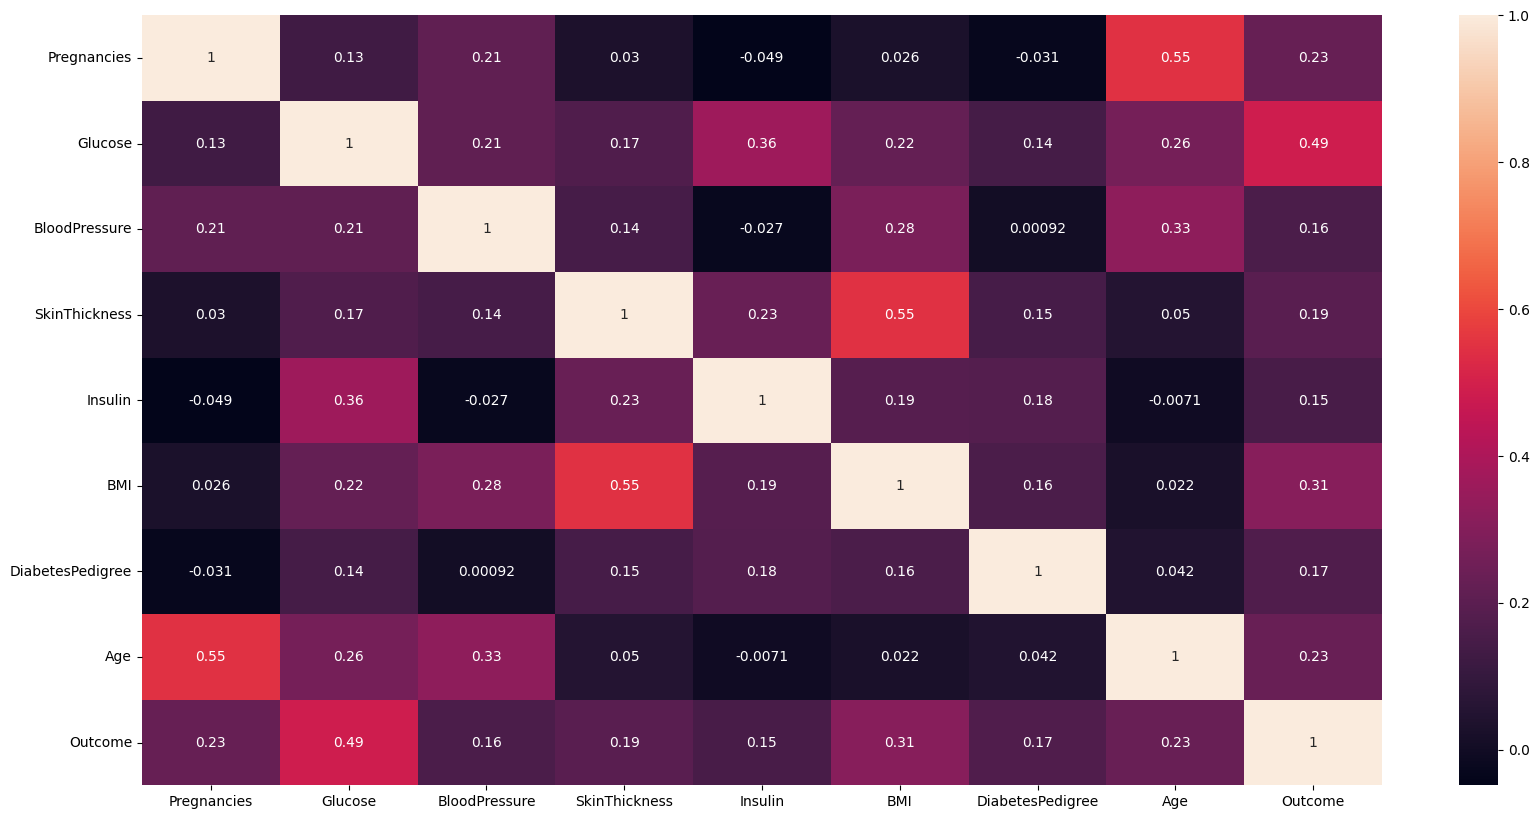

In [167]:
plt.subplots(figsize=(20, 10))#Visualizing the new correlation heatmap
sns.heatmap(data=corr_new, annot=True) # using Seaborn's heatmap
plt.show()

In [172]:
corr_new["Outcome"].sort_values(ascending=False) #Correlation values in Descending order wrt Outcome

Outcome             1.000000
Glucose             0.486978
BMI                 0.309369
Age                 0.232892
Pregnancies         0.229235
SkinThickness       0.193141
DiabetesPedigree    0.170688
BloodPressure       0.159144
Insulin             0.151832
Name: Outcome, dtype: float64

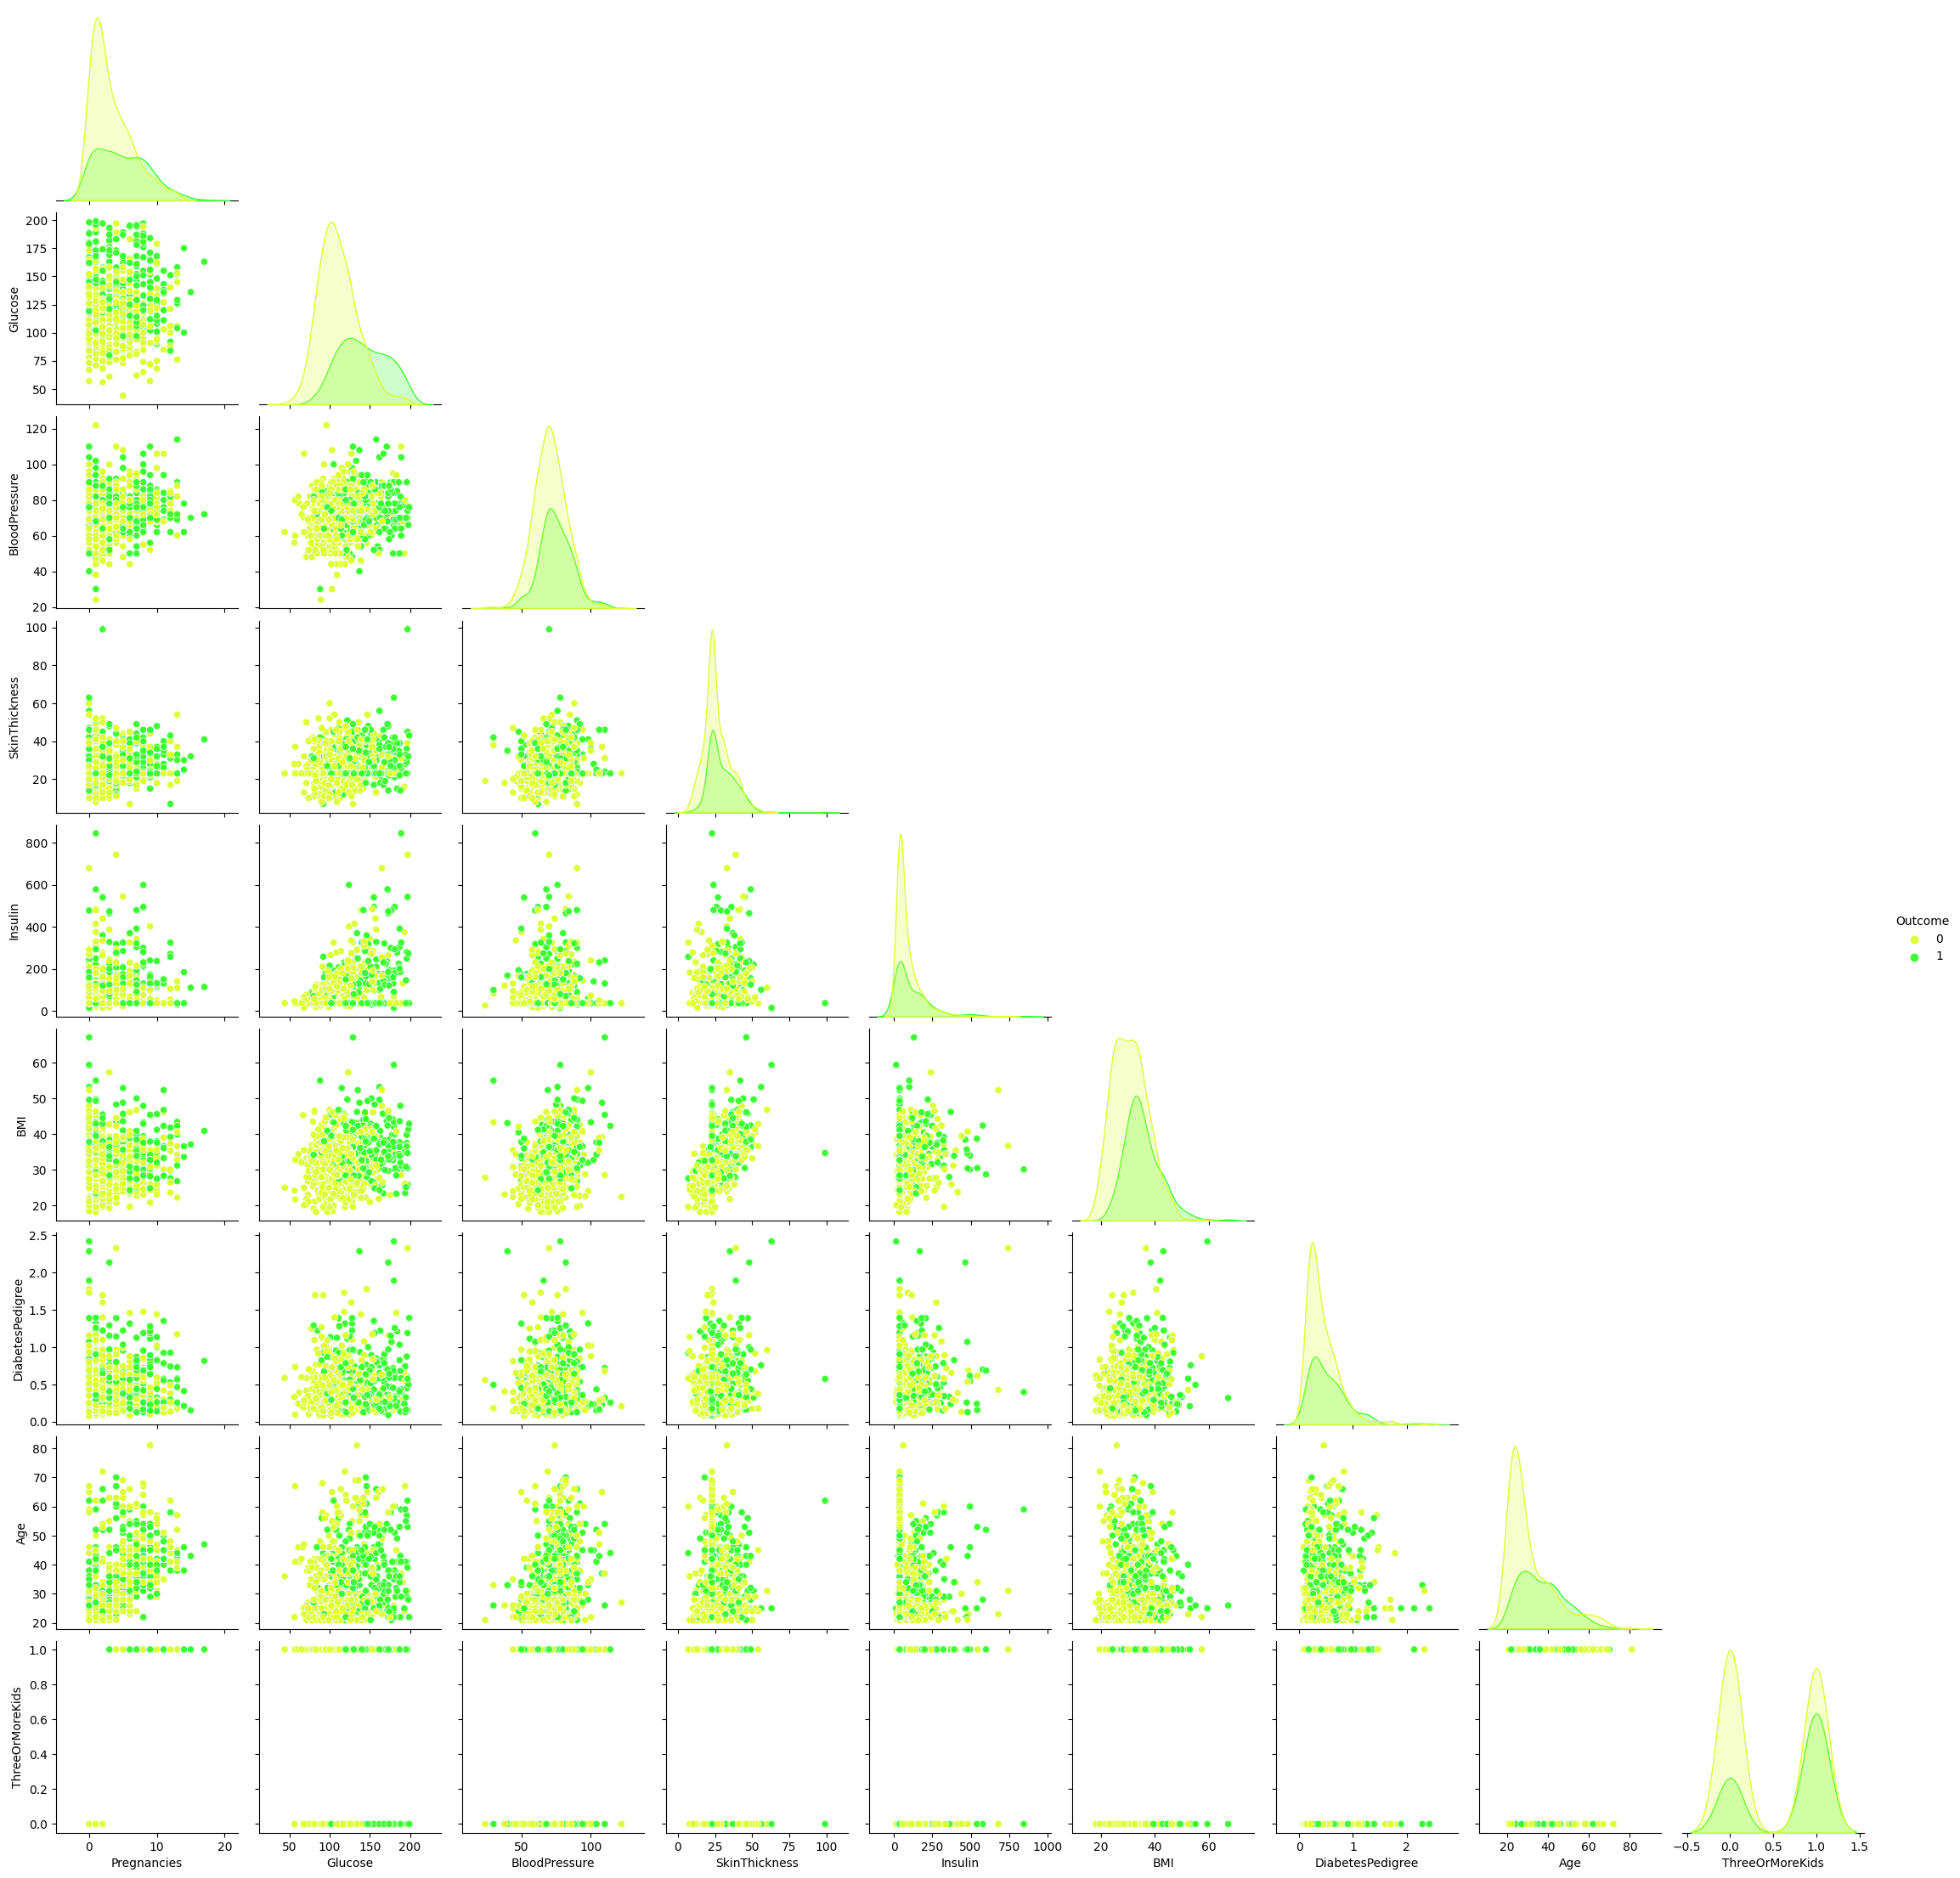

In [166]:
sns.pairplot(diabetes_data, hue='Outcome', corner=True, palette=('#DDFF33','#3CFF33'))
#Using Seaborn's pair plot to show plots based on Hue as Outcome

In [35]:
diabetes_data['Outcome'].value_counts() #Finding Diabetic and Non Diabetic Patients

0    490
1    260
Name: Outcome, dtype: int64

In [173]:
diabetes = len(diabetes_data.loc[diabetes_data['Outcome'] == 1]) # Finding the percentage ratio
no_diabetes = len(diabetes_data.loc[diabetes_data['Outcome'] == 0])
print("Number of Non-Diabetic cases: {0} ({1:2.2f}%)".format(no_diabetes, (diabetes / (diabetes + no_diabetes)) * 100))
print("Number of Diabetes cases: {0} ({1:2.2f}%)".format(diabetes, (diabetes / (diabetes + no_diabetes)) * 100 ))

Number of Non-Diabetic cases: 490 (34.67%)
Number of Diabetes cases: 260 (34.67%)


## 3) Adding a Column 'ThreeOrMoreKids' and fitting appropriate Regression Model 

### 3.1 Adding new columns 'ThreeOrMoreKids'

In [39]:
diabetes_data['ThreeOrMoreKids'] = np.where(diabetes_data['Pregnancies'] >= 3, 1, 0)# Adding column 3 or More Kids

In [42]:
diabetes_data['ThreeOrMoreKids'].head() # Column Created with Datatype Int 
# Representing 1 for 3>=Pregnancies and 0 for less than 3

0    1
1    0
2    1
3    0
4    0
Name: ThreeOrMoreKids, dtype: int32

### 3.2 Creating Appropriate Model

In [47]:
X = diabetes_data[['ThreeOrMoreKids']] #Converting one variable into suitable array
# to avoid reshaping error later during model creation
Y = diabetes_data['Outcome'] 
#X = X.reshape(-1,1)
# No need to reshape or convert the second variable

In [48]:
model = LogisticRegression(solver = 'liblinear',random_state = 0)


In [49]:
model.fit(X,Y)

LogisticRegression(random_state=0, solver='liblinear')

In [50]:
model.score(X,Y)

0.6533333333333333

In [51]:
model.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

What is the probability that you get diabetes, given that you have two or fewer children?

In [54]:
X_Less_3 = X[X['ThreeOrMoreKids'] == 0] # Three or More kids is False
Prediction_1 = np.unique(model.predict_proba(X_Less_3)[:,1]) # Outcome =1
Prediction_1 # using predict proba to find the probability

array([0.24693193])

What is the probability that you get diabetes, given that you have three or more chil‑
dren?

In [56]:
X_More_3 = X[X['ThreeOrMoreKids'] == 1] # Three or More kids is True
Prediction_2 = np.unique(model.predict_proba(X_More_3)[:,1]) # Outcome = 1
Prediction_2 # using predict proba to find the probability

array([0.43209335])

<AxesSubplot: xlabel='ThreeOrMoreKids', ylabel='Outcome'>

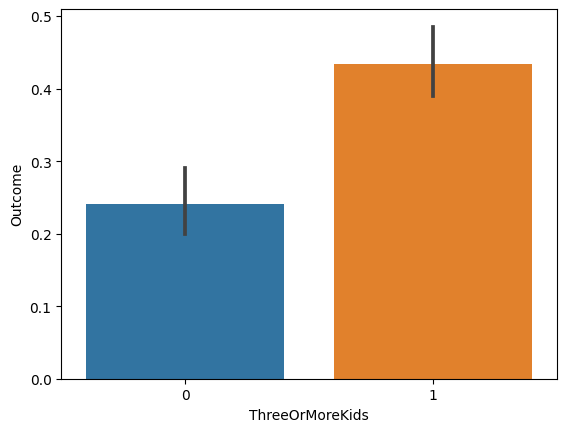

In [80]:
sns.barplot(data=diabetes_data, x="ThreeOrMoreKids", y="Outcome")

## 4 CREATING MULTIPLE LOGISTIC MODEL BY REMOVING INCONSISTENT COLUMNS



In [62]:
# # Fit the model on train Logistic Regression Code to Be Followed
# model = LogisticRegression(solver="liblinear")
# model.fit(x_train, y_train)
# #predict on test
# y_predict = model.predict(x_test)

In [174]:
# Loading the Logistics Regression Prediction Model to Calculate Accuracy of Different Models
logreg=LogisticRegression()
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)

In [86]:
diabetes_copy=diabetes_data.copy(deep=True) #Creating a copy to create multiple models

In [62]:
scaler=StandardScaler() # Standardisation made no difference

In [141]:
diabetes_copy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigree,Age,Outcome,ThreeOrMoreKids
0,6,148.0,72.0,35,36.5,33.6,0.627,50,1,1
1,1,85.0,66.0,29,36.5,26.6,0.351,31,0,0
2,8,183.0,64.0,23,36.5,23.3,0.672,32,1,1
3,1,89.0,66.0,23,94.0,28.1,0.167,21,0,0
4,0,137.0,40.0,35,168.0,43.1,2.288,33,1,0


### CREATING THREE MODELS WITH DROPPING DIFFERENT NO. OF COLUMNS WHICH HAD INCONSISTENCIES (BUT REPLACED WITH MEAN & MEDIAN)

In [171]:
# CREATING MULTIPLE MODELS BASED ON DATA CLEANING
# Model 1
Model1 = diabetes_copy.iloc[:,0:8] #including all columns
logreg.fit(Model1,y)
log_predicted_Model1=logreg.predict(Model1)
accuracy_model1=logreg.score(Model1,y)

# Model 2
Model2 = diabetes_copy.iloc[:,0:4] #including first 4 columns
logreg.fit(Model2,y)
log_predicted_Model2=logreg.predict(Model2)
accuracy_model2=logreg.score(Model2,y)

# Model 3
Model3 = diabetes_copy.iloc[:,0:2] #including first 2 columns
logreg.fit(Model3,y)
log_predicted_Model3=logreg.predict(Model3)
accuracy_model3=logreg.score(Model3,y)

In [168]:
print(accuracy_model1*100) # Score of Model 1

78.0


In [169]:
print(accuracy_model2*100) # Score of Model 2

75.2


In [170]:
print(accuracy_model3*100) # Score of Model 3

74.66666666666667


In [146]:
final_model = Model1 # because of its highest accuracy of 78%

WE CAN SEE DROPPING COLUMNS IS REDUCING THE ACCURACY THIS WOULD HAVE BEEN OPPOSITE IF WE DIDN'T REPLACE THE 0 VALUES WITH MEAN OR MEDIAN, IF ZERO VALUES WERE STILL PRESENT IN THE DATASET THEN DROPPING THOSE COLUMNS WOULD HAVE INCREASED ACCURACY OF MODEL

In [134]:
predict_Diabetes =pd.read_csv("ToPredict.csv")

In [99]:
predict_Diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigree,Age
0,4,136,70,0,0,31.2,1.182,22
1,1,121,78,39,74,39.0,0.261,28
2,3,108,62,24,0,26.0,0.223,25
3,0,181,88,44,510,43.3,0.222,26
4,8,154,78,32,0,32.4,0.443,45


In [100]:
predict_Diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigree,Age
count,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,3.200000,140.00000,75.200000,27.800000,116.800000,34.380000,0.466200,29.200000
std,3.114482,28.62691,9.757049,17.268468,222.128791,6.803822,0.410425,9.093954
min,0.000000,108.00000,62.000000,0.000000,0.000000,26.000000,0.222000,22.000000
25%,1.000000,121.00000,70.000000,24.000000,0.000000,31.200000,0.223000,25.000000
50%,3.000000,136.00000,78.000000,32.000000,0.000000,32.400000,0.261000,26.000000
75%,4.000000,154.00000,78.000000,39.000000,74.000000,39.000000,0.443000,28.000000
max,8.000000,181.00000,88.000000,44.000000,510.000000,43.300000,1.182000,45.000000


In [101]:
#replacing 0 values with median of that column for the following small data and distribution check like previous large data is not possible
predict_Diabetes['SkinThickness']=predict_Diabetes['SkinThickness'].replace(0,predict_Diabetes['SkinThickness'].median())
predict_Diabetes['Insulin']=predict_Diabetes['Insulin'].replace(0,predict_Diabetes['Insulin'].median())
predict_Diabetes['BMI']=predict_Diabetes['BMI'].replace(0,predict_Diabetes['BMI'].median())

In [147]:
#Predict
logreg = LogisticRegression(max_iter=10000)
logreg = model.fit(final_model, diabetes_copy['Outcome'])
X_Predict = predict_Diabetes.iloc[:,0:8] # Same no of columns as Diabetes Dataset Copy
log_predicted_final = logreg.predict(X_Predict)
log_predicted_final

array([1, 0, 0, 1, 1], dtype=int64)

### 1 represents Positive for Diabetes and 0 represents negative for Diabetes

In [148]:
# Finding probabilities for Diabetes
Predict_Probabilities = logreg.predict_proba(X_Predict)[:,1]

In [163]:
print(Predict_Probabilities)

[0.69098696 0.25324206 0.10261771 0.64947076 0.68958759]
